<a href="https://www.kaggle.com/code/orestasdulinskas/temperature-forecasting?scriptVersionId=166333898" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![Thermometer and sky](https://media.istockphoto.com/id/1323823418/photo/low-angle-view-thermometer-on-blue-sky-with-sun-shining.jpg?s=612x612&w=0&k=20&c=LwLCGF902C-DNwKgCMCR12zFnB4g1INWzlk1JPOidRk=)

# Temperature Forecasting
---

This data science project aims to forecast the hourly dry-bulb temperature (HOURLYDRYBULBTEMPF) using the NOAA JFK dataset, which comprises 75,119 hourly observations of various climatological variables collected at John F. Kennedy International Airport in Queens, New York. The dry-bulb temperature is a fundamental indicator of air temperature and plays a crucial role in various domains such as aviation. By accurately predicting the hourly dry-bulb temperature, this project seeks to provide valuable insights for weather-sensitive operations, such as flight scheduling and energy demand management. Additionally, understanding the temporal patterns and fluctuations in temperature can contribute to climate research and resilience planning in the face of climate change. Through thorough data analysis, modeling, and validation, this project aims to develop a reliable forecasting model that can assist stakeholders in making informed decisions based on future temperature trends at JFK airport.

# Data Cleaning
---

In [1]:
# Import dataset
import pandas as pd

path = r'/kaggle/input/noaa-weather-data-jfk-airport/jfk_weather_cleaned.csv'
df = pd.read_csv(path)
df.head()

,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.0,1.0,0,1,0
1,2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.0,1.0,0,1,0
2,2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.0,1.0,0,1,0
3,2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.0,1.0,0,1,0
4,2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.0,1.0,0,1,0


In [2]:
df.info() # Summary of DataFrame information

print('\nNumber of unique values in each column')
for i in df.columns:
    print(f'{i} - {df[i].nunique()}')

print('\nNumber of missing values in each column\n', df.isnull().sum())

print('\nNumber of duplicated rows\n', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75119 entries, 0 to 75118
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATE                        75119 non-null  object 
 1   HOURLYVISIBILITY            75119 non-null  float64
 2   HOURLYDRYBULBTEMPF          75119 non-null  float64
 3   HOURLYWETBULBTEMPF          75119 non-null  float64
 4   HOURLYDewPointTempF         75119 non-null  float64
 5   HOURLYRelativeHumidity      75119 non-null  float64
 6   HOURLYWindSpeed             75119 non-null  float64
 7   HOURLYStationPressure       75119 non-null  float64
 8   HOURLYSeaLevelPressure      75119 non-null  float64
 9   HOURLYPrecip                75119 non-null  float64
 10  HOURLYAltimeterSetting      75119 non-null  float64
 11  HOURLYWindDirectionSin      75119 non-null  float64
 12  HOURLYWindDirectionCos      75119 non-null  float64
 13  HOURLYPressureTendencyIncr  751

In [3]:
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True, format='ISO8601') # Convert date to datetime format

In [4]:
# Remove 'Hourly' and lowercase all column names
columns_to_rename = df.drop('DATE',axis=1).columns 

new_column_names = columns_to_rename.str.replace('HOURLY', '').str.lower()
df.rename(columns=dict(zip(columns_to_rename, new_column_names)), inplace=True)

In [5]:
# Remove all irrelevant columns
df = df[['DATE', 'drybulbtempf']]

In [6]:
df.describe()

,DATE,drybulbtempf
count,75119,75119.000000
mean,2014-04-15 00:00:00,55.355509
min,2010-01-01 01:00:00,1.000000
25%,2012-02-22 12:30:00,42.000000
50%,2014-04-15 00:00:00,56.000000
75%,2016-06-05 11:30:00,70.000000
max,2018-07-27 23:00:00,102.000000
std,NaN,17.393210


In [7]:
# Checking time intervals to ensure timestamps are equidistant
intervals = df['DATE'] - df['DATE'].shift(1)

print(f"{intervals.value_counts()}")

DATE
0 days 01:00:00    75118
Name: count, dtype: int64


**Summary**: Since I am using cleaned dataset, there are not missing or duplicate values. Removed irrelevant columns and set date feature to correct format

# Exploratory Data Analysis (EDA)
---

### Visualising data

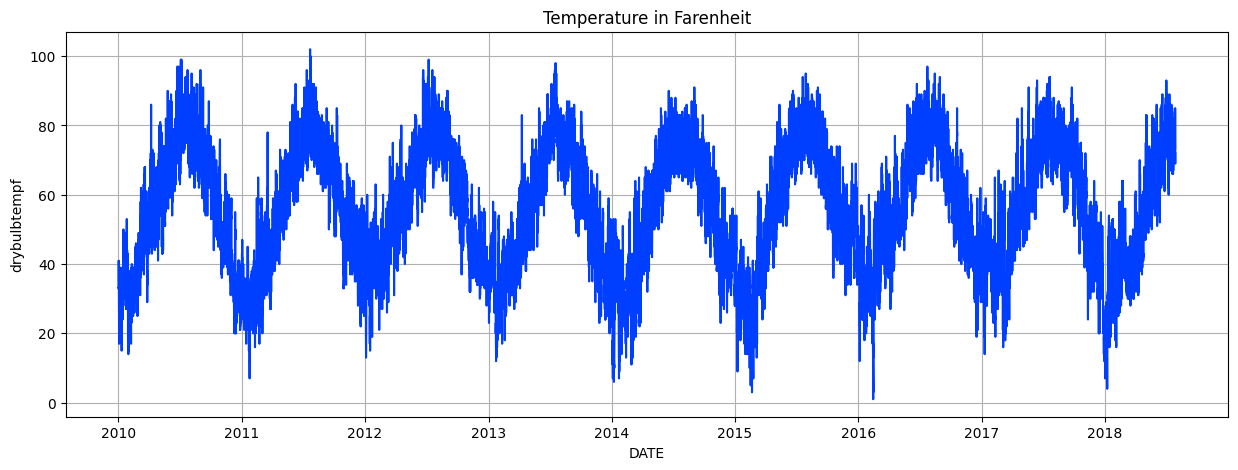

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use('seaborn-v0_8-bright')
colors = sns.color_palette('bright')
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(15, 5))
fig = sns.lineplot(x=df['DATE'], y=df['drybulbtempf'])
fig.set_title('Temperature in Farenheit')
fig.grid(True)
plt.show()

**Summary**: The graph displays the fluctuations of a temperature feature called "drybulbtempf" measured in Fahrenheit over the years from 2010 to 2018. The temperature shows a distinct seasonal pattern, with peaks reaching around 80-90°F and troughs around 20-40°F. This cyclical behavior repeats annually, suggesting the temperature variations are likely influenced by seasonal changes throughout the year.

### Checking Resampling Options

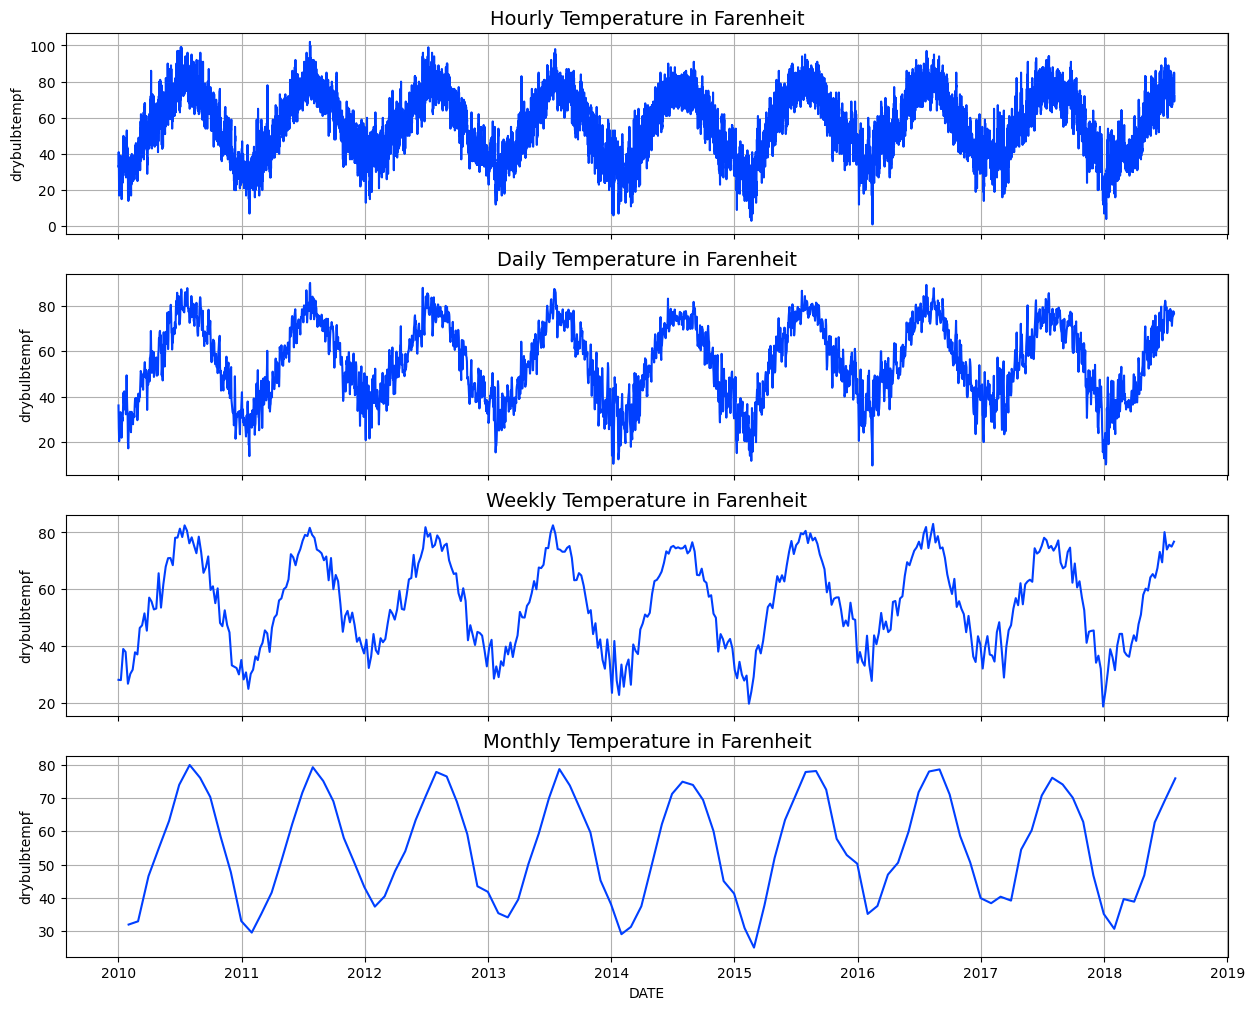

In [9]:
fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(15,12))

sns.lineplot(x=df['DATE'], y=df['drybulbtempf'], ax=ax[0])
ax[0].set_title('Hourly Temperature in Farenheit', fontsize=14)
ax[0].grid(True)

resampled_df = df[['DATE','drybulbtempf']].resample('D', on='DATE').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['DATE'], y=resampled_df['drybulbtempf'], ax=ax[1])
ax[1].set_title('Daily Temperature in Farenheit', fontsize=14)
ax[1].grid(True)

resampled_df = df[['DATE','drybulbtempf']].resample('7D', on='DATE').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['DATE'], y=resampled_df['drybulbtempf'], ax=ax[2])
ax[2].set_title('Weekly Temperature in Farenheit', fontsize=14)
ax[2].grid(True)

resampled_df = df[['DATE','drybulbtempf']].resample('M', on='DATE').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['DATE'], y=resampled_df['drybulbtempf'], ax=ax[3])
ax[3].set_title('Monthly Temperature in Farenheit', fontsize=14)
ax[3].grid(True)

plt.show()

**Summary**: Choosing to stick with hourly records over resampling to daily data. Hourly data provides finer granularity, capturing short-term fluctuations and diurnal patterns more accurately. This level of detail is essential for applications requiring precise timing, such as aviation scheduling or event planning. Additionally, hourly readings enable the detection of sudden temperature changes or extreme events within a day, enhancing situational awareness and response capabilities. While daily data may simplify modeling and conserve computational resources, the benefits of hourly readings, including improved accuracy and insight into temporal dynamics, outweigh these considerations for many forecasting applications. Ultimately, the choice between hourly and daily data should align with the specific needs and objectives of the project.

### Plotting rolling statistics

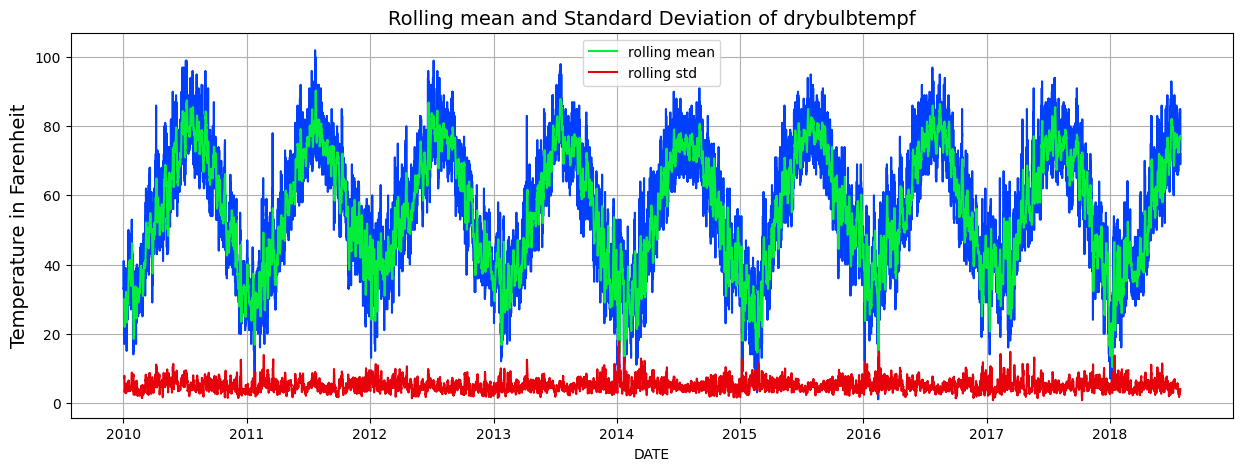

In [10]:
rolling_window = 52
plt.figure(figsize=(15, 5))

sns.lineplot(x=df['DATE'], y=df['drybulbtempf'])
sns.lineplot(x=df['DATE'], y=df['drybulbtempf'].rolling(rolling_window).mean(), label='rolling mean')
sns.lineplot(x=df['DATE'], y=df['drybulbtempf'].rolling(rolling_window).std(), label='rolling std')
plt.title('Rolling mean and Standard Deviation of drybulbtempf', fontsize=14)
plt.ylabel(ylabel='Temperature in Farenheit', fontsize=14)
plt.grid(True)

plt.show()

**Summary**: The rolling mean line (in green) shows a smoothed average trend of the temperature, clearly highlighting the yearly seasonal cycle pattern with peaks around summer and troughs around winter. This rolling average helps visualize the underlying cyclical behavior amidst the fluctuating raw temperature values.

The rolling standard deviation line (in red) indicates the amount of variability or spread around the mean temperature at each point in time. This line exhibits its own cyclical pattern, with higher values during winter and transitional periods between seasons (sprint and fall) when temperatures tend to fluctuate more widely. The lower values correspond to more stable temperatures during peak summer.

### Exploring Distribution

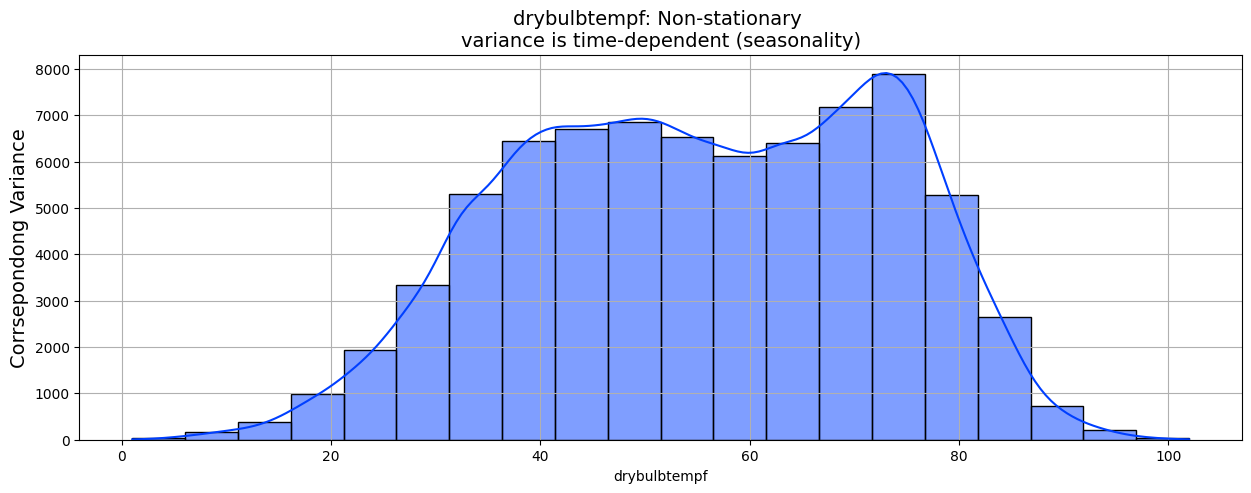

In [11]:
import numpy as np

plt.figure(figsize=(15, 5))

sns.histplot(df['drybulbtempf'].fillna(np.inf), kde=True, bins=20)
plt.title('drybulbtempf: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
plt.ylabel(ylabel='Corrsepondong Variance', fontsize=14)
plt.grid(True)

plt.show()

**Summary**: The shape of the curve indicates that the variance is not constant or stationary across all temperature levels. Instead, it exhibits a pattern of non-stationarity where the variance changes depending on the temperature value itself.

Specifically, the variance is relatively low for lower and higher temperature extremes, forming the tails of the distribution. However, there is a pronounced peak in the variance around the middle temperature range, suggesting that the fluctuations or spread in temperature values is highest in this region.

# Feature Engineering
---

### Extracting Time Features

In [12]:
df['hour'] = df['DATE'].dt.hour
df['dayofweek'] = df['DATE'].dt.dayofweek
df['quarter'] = df['DATE'].dt.quarter
df['month'] = df['DATE'].dt.month
df['year'] = df['DATE'].dt.year
df['dayofyear'] = df['DATE'].dt.dayofyear
df['dayofmonth'] = df['DATE'].dt.day
df['season'] = df.month%12 // 3 + 1

df[['hour', 'dayofweek','DATE', 'year', 'month', 'dayofmonth', 'dayofyear', 'quarter', 'season']].head()

,hour,dayofweek,DATE,year,month,dayofmonth,dayofyear,quarter,season
0,1,4,2010-01-01 01:00:00,2010,1,1,1,1,1
1,2,4,2010-01-01 02:00:00,2010,1,1,1,1,1
2,3,4,2010-01-01 03:00:00,2010,1,1,1,1,1
3,4,4,2010-01-01 04:00:00,2010,1,1,1,1,1
4,5,4,2010-01-01 05:00:00,2010,1,1,1,1,1


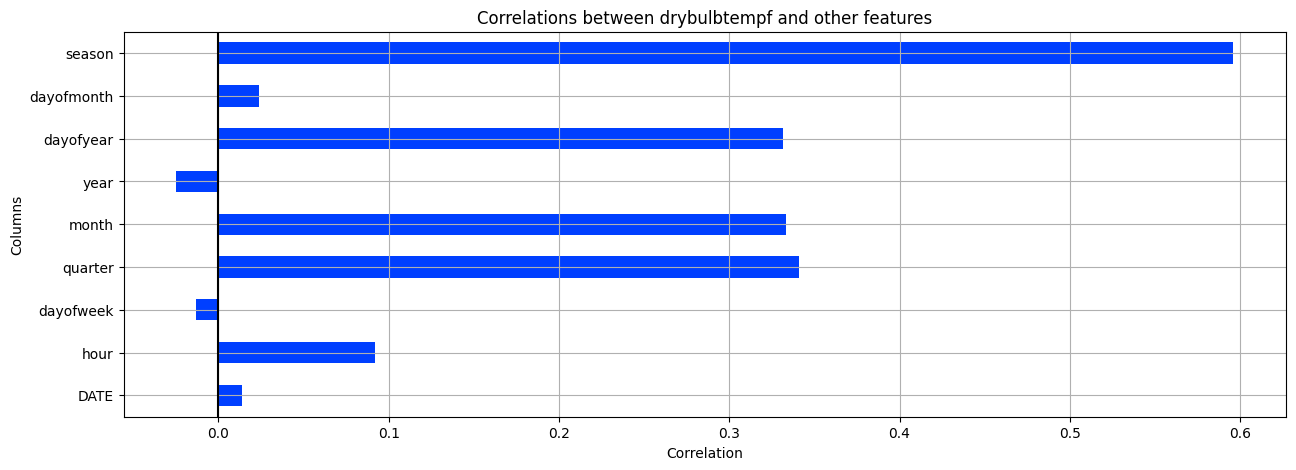

In [13]:
plt.figure(figsize=(15,5))

subject = df.corr()['drybulbtempf'].drop('drybulbtempf',axis=0)
subject.plot(kind='barh')
plt.ylabel('Columns')
plt.xlabel('Correlation')
plt.title('Correlations between drybulbtempf and other features')
plt.axvline(x=0, color='black')
plt.grid(True)

plt.show()

**Summary**:
* The "season" feature has the strongest positive correlation with "drybulbtempf", suggesting that temperature is highly dependent on the seasonal cycle.
* "dayofyear" also exhibit relatively strong positive correlations, indicating that the temperature varies systematically within each day and across the year.
* Features like "month" and "quarter" show moderate positive correlations, implying some dependency between temperature and these temporal variables.
* The "hour" feature has a relatively weak positive correlation, suggesting that the hourly variation in temperature within a day is not as prominent compared to the daily, monthly, and seasonal patterns.
* The "DATE" feature has a very low correlation, possibly because its relationship with temperature is already captured by the other more interpretable time-based features.

### Creating Lagged Features

In [14]:
df = df.set_index('DATE') # Setting DATE as index
target_map = df['drybulbtempf'].to_dict() # Setting target as dictionary

def add_lag(df):
    
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

# Train-Test Split
---

### Creating Time Series Splits for Cross-Validation

In [15]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 5

X = df.index
y = df.drybulbtempf

tss = TimeSeriesSplit(n_splits=N_SPLITS)

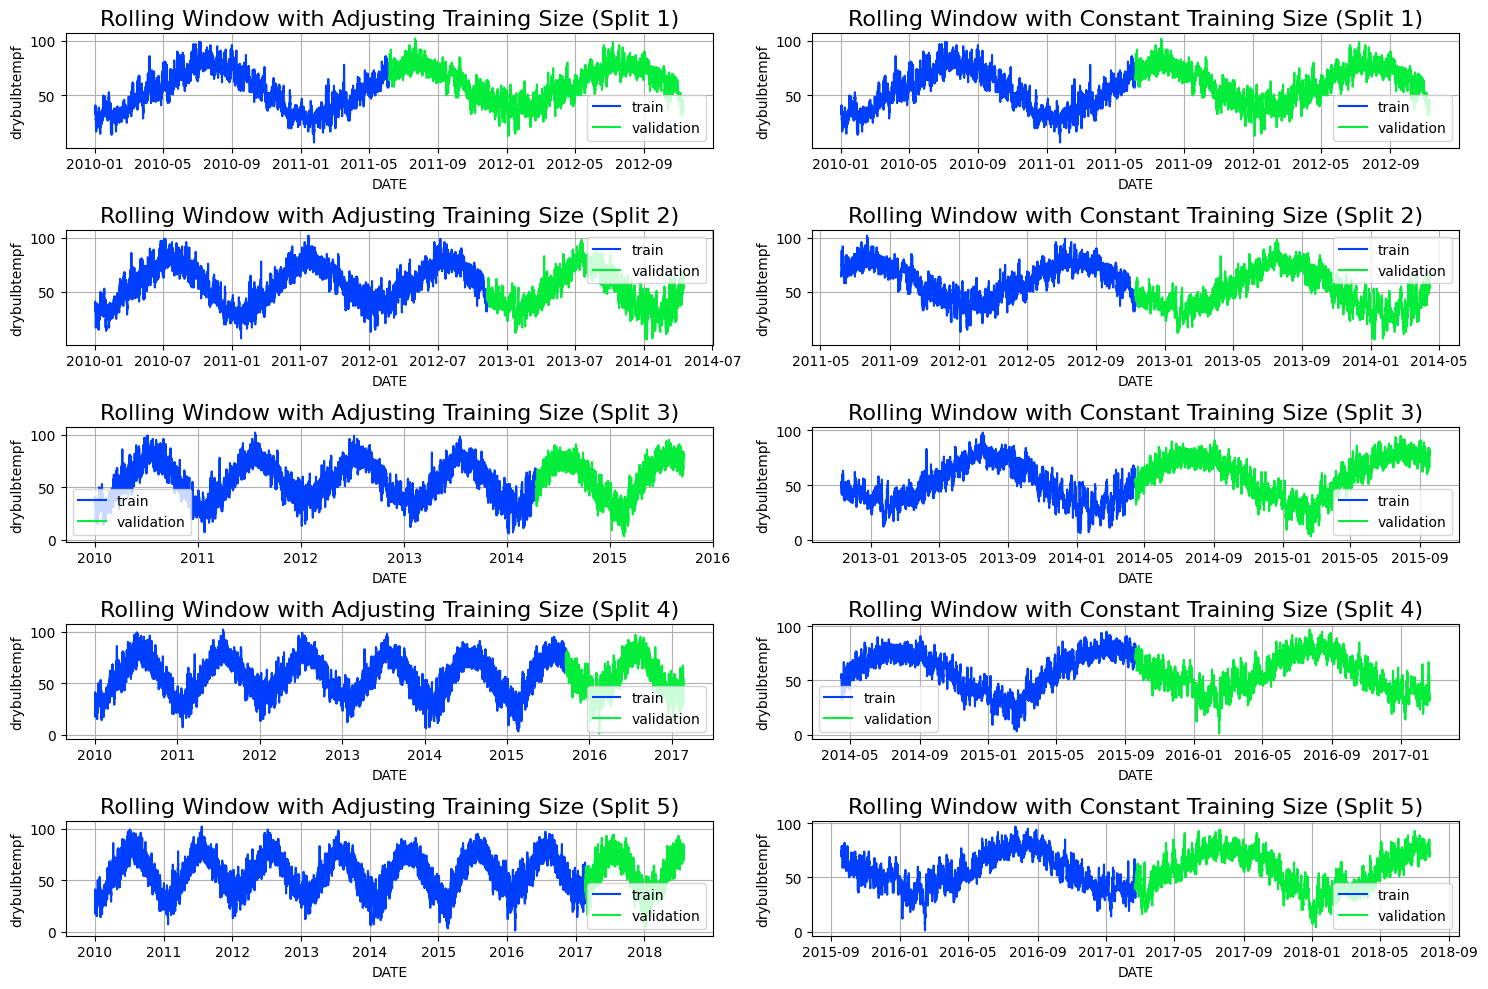

In [16]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(15, 10))

for i, (train_index, valid_index) in enumerate(tss.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(x= X_train, y= y_train, ax=ax[i,0], label='train')
    sns.lineplot(x= X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 y= y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 ax=ax[i,1], label='train')

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j],label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 0].grid(True)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].grid(True)

plt.tight_layout()
plt.show()

# Model Selection
---

### Defining models

In [17]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
    "HistGradientBoostingRegressor": {'model':HistGradientBoostingRegressor()},
    
    "KNeighborsRegressor": {'model':KNeighborsRegressor()},
    
    "DecisionTreeRegressor": {'model':DecisionTreeRegressor()},
    
    "RandomForestRegressor": {'model':RandomForestRegressor()},
    
    "XGBoost": {'model':XGBRegressor()}
        }

### Function for Evaluating Model Performance with Prediction Plots

In [18]:
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def plot_approach_evaluation(y_pred, score_mae, score_rsme, approach_name):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    f.suptitle(approach_name, fontsize=16)
    sns.lineplot(x=df.index.values, y=df['drybulbtempf'].values, ax=ax[0], label='Training', linewidth=2)
    sns.lineplot(x=X_val.index.values, y=X_val['drybulbtempf'].values, ax=ax[0], label='Ground Truth', linewidth=2)
    sns.lineplot(x=X_val.index.values, y=y_pred, ax=ax[0], label='Predicted', linewidth=2)
    ax[0].set_title(f'Prediction \n MAE: {mean_absolute_error(X_val.drybulbtempf, y_pred):.2f}, RMSE: {math.sqrt(mean_squared_error(X_val.drybulbtempf, y_pred)):.2f}', fontsize=14)
    ax[0].set_xlabel(xlabel='Date', fontsize=14)
    ax[0].set_xlim(pd.to_datetime('01-Jan-2017'),)
    ax[0].set_ylabel(ylabel='Temperature in Farenheit', fontsize=14)
    ax[0].grid(True)

    sns.lineplot(x=folds, y=score_mae, label='MAE', ax=ax[1])
    sns.lineplot(x=folds, y=score_rsme, label='RMSE', ax=ax[1])
    ax[1].set_title('Loss', fontsize=14)
    ax[1].set_xlabel(xlabel='Fold', fontsize=14)
    ax[1].set_ylabel(ylabel='Loss', fontsize=14)
    ax[1].grid(True)
    plt.show()

In [19]:
def compare_models(model_scores):
    fig, ax = plt.subplots(figsize=(15, 5))
    bars = ax.bar(model_scores.keys(), model_scores.values())
    ax.bar_label(bars, label_type="edge")
    ax.set_ylabel(ylabel='RMSE Score', fontsize=14)
    plt.grid(True)
    plt.show()

### Model Training and Evaluation with Time Series Cross-Validation

In [20]:
features = df.drop(['drybulbtempf'],axis=1).columns
target = ['drybulbtempf']

split_date = pd.to_datetime('01-Oct-2017')
X_val = df.loc[df.index > split_date].copy()
y_val = df.loc[df.index <= split_date].copy()

Training HistGradientBoostingRegressor 

HistGradientBoostingRegressor has a RMSE score of 9 



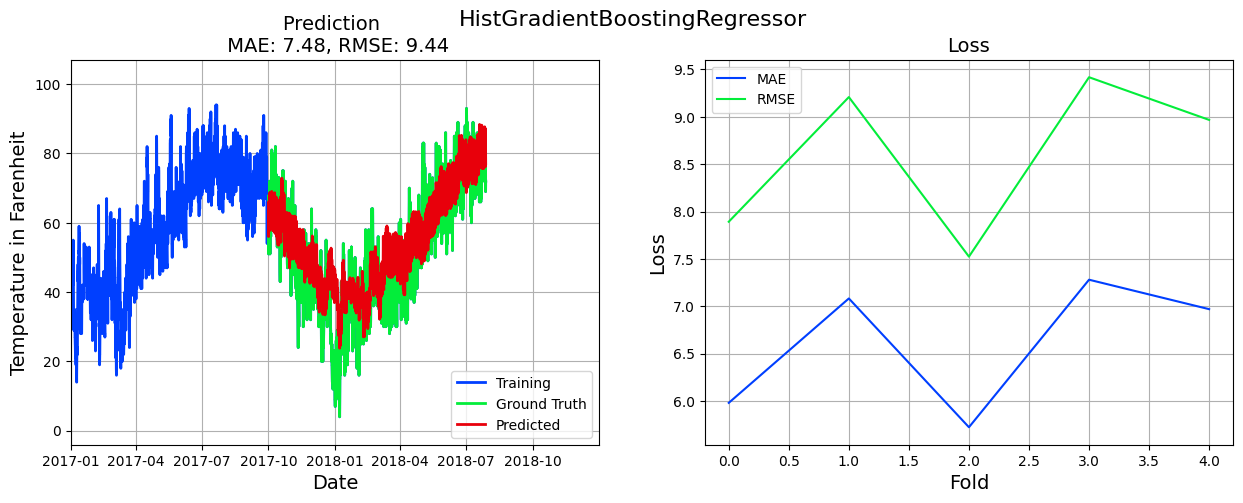

Training KNeighborsRegressor 

KNeighborsRegressor has a RMSE score of 10 



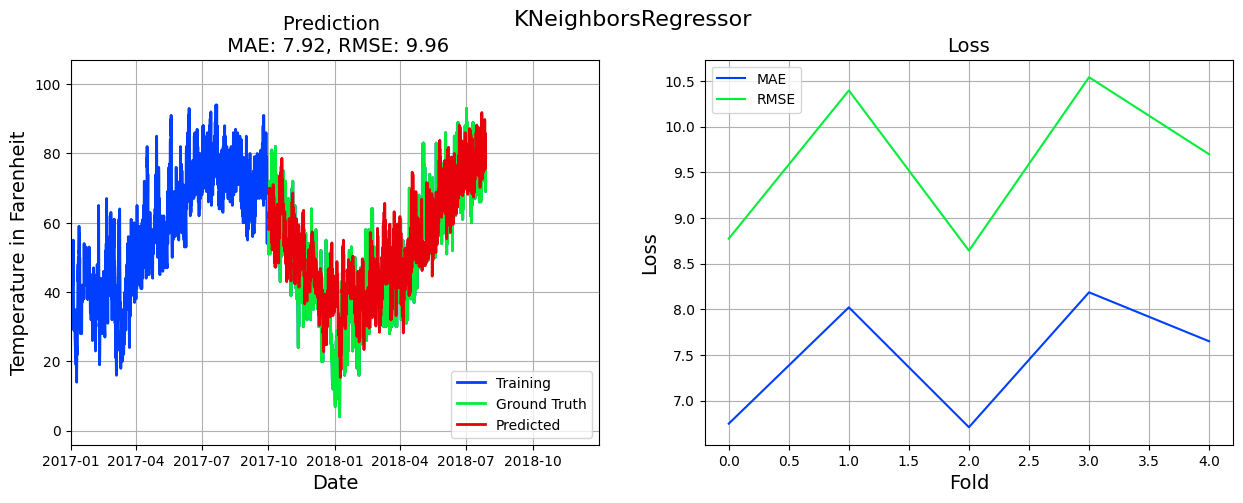

Training DecisionTreeRegressor 

DecisionTreeRegressor has a RMSE score of 10 



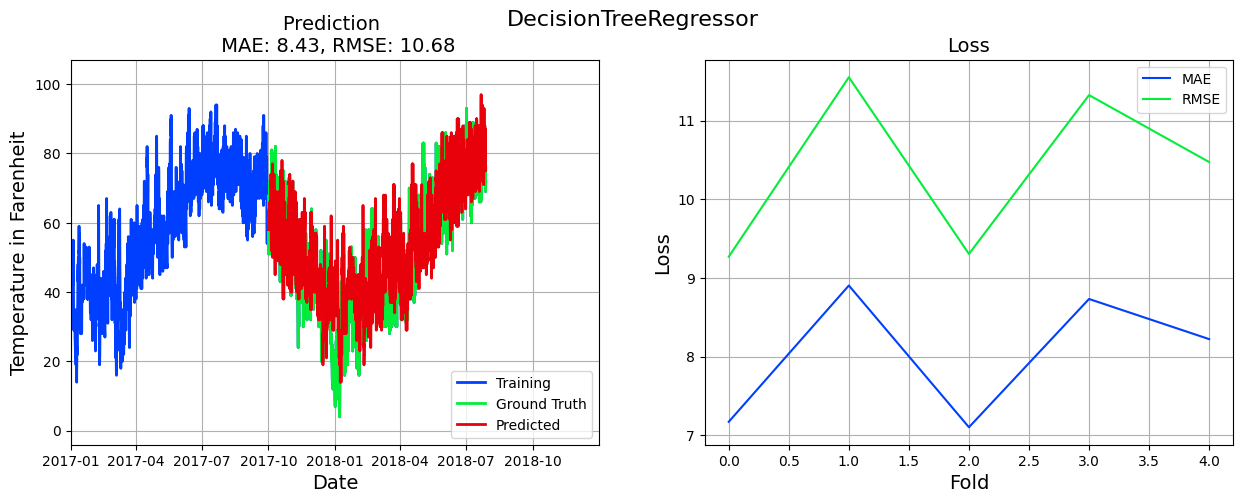

Training RandomForestRegressor 

RandomForestRegressor has a RMSE score of 10 



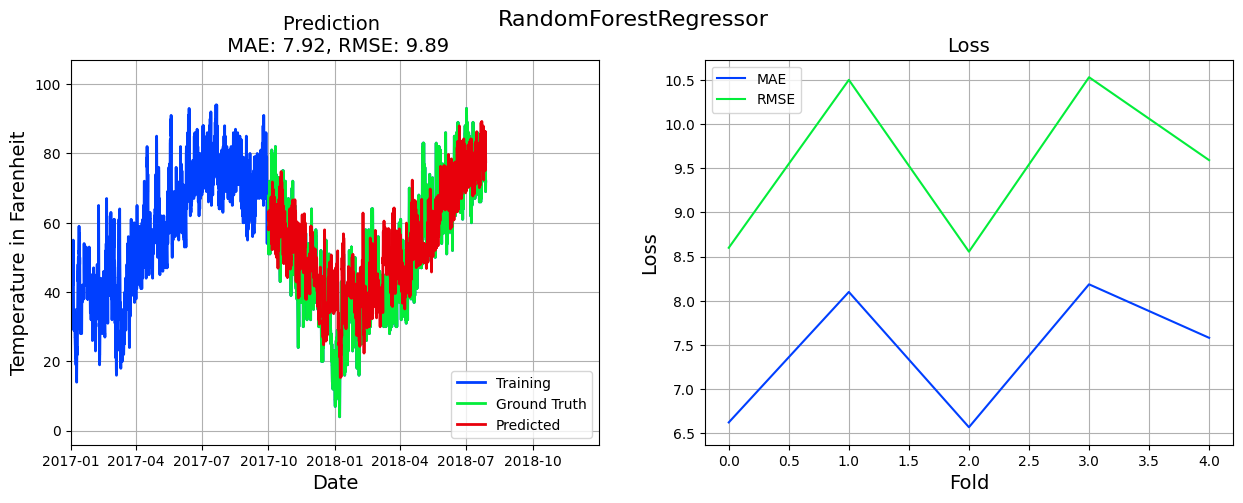

Training XGBRegressor 

XGBRegressor has a RMSE score of 9 



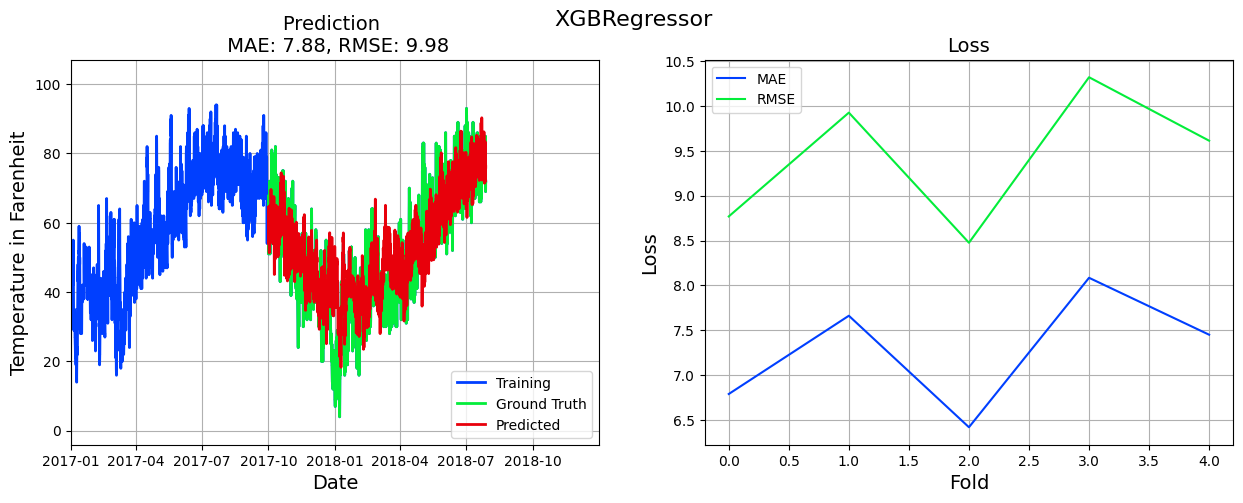

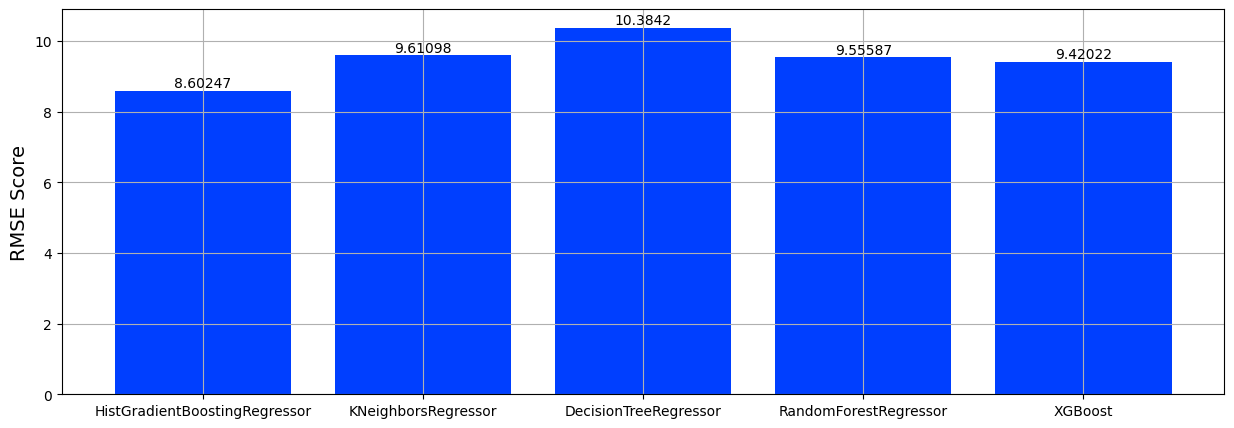

In [21]:
folds = list(range(N_SPLITS))

preds= []
model_scores = {}

# Iterating through models
for key, model in models.items():
    
    print('Training', model['model'].__class__.__name__, '\n')
    
    score_mae = []
    score_rmse = []
    
    # Iterating through splits
    for train_idx, val_idx in tss.split(df):
        
        # Setting up data
        train = df.iloc[train_idx]
        test = df.iloc[val_idx]

        X_train = train[features]
        y_train = train[target]

        X_test = test[features]
        y_test = test[target]
        
        # Fitting the model
        try:
            model['model'].fit(X_train.values, y_train.values, 
                    eval_metric='rmsle'
                              )
        except TypeError:
            model['model'].fit(X_train.values, y_train.values.ravel())
        
        # Evaluating split performance
        y_pred = model['model'].predict(X_test.values)
        preds.append(y_pred)
        score_mae.append(mean_absolute_error(y_test, y_pred))
        score_rmse.append(math.sqrt(mean_squared_error(y_test, y_pred)))
    
    # Evaluating model performance
    model_scores[key] = np.mean(score_rmse)
    print(model['model'].__class__.__name__, "has a RMSE score of", round(np.mean(score_rmse)), '\n')
    
    y_pred = model['model'].predict(X_val[features])
    plot_approach_evaluation(y_pred, score_mae, score_rmse, model['model'].__class__.__name__)

# Comparing model performance
compare_models(model_scores)

# Model Optimization
---

### Specifying hyperparameters for best performing models

In [22]:
models = {
    "HistGradientBoostingRegressor": {'model':HistGradientBoostingRegressor(), 'params':{
        'learning_rate': [0.05, 0.06, 0.08],
        'max_leaf_nodes': [3, 5, 8],
        'max_bins': [80, 100, 120],
        'l2_regularization': [0.7, 0.9, 1.1]
        }},
    
    "XGBoost": {'model':XGBRegressor(), 'params':{
        'learning_rate': [0.04, 0.05, 0.07],
        'max_depth': [1, 2, 4],
        'subsample': [0.6, 0.8, 1.0, None],
        'colsample_bytree': [0.6, 0.8, 0.9],
        'objective': ['reg:squarederror']
        }}
        }

### Introducing lag to the dataset

In [23]:
df = add_lag(df)

### Model Training and Evaluation with Time Series Cross-Validation

Training XGBoost 

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
XGBRegressor has a RMSE score of 8 



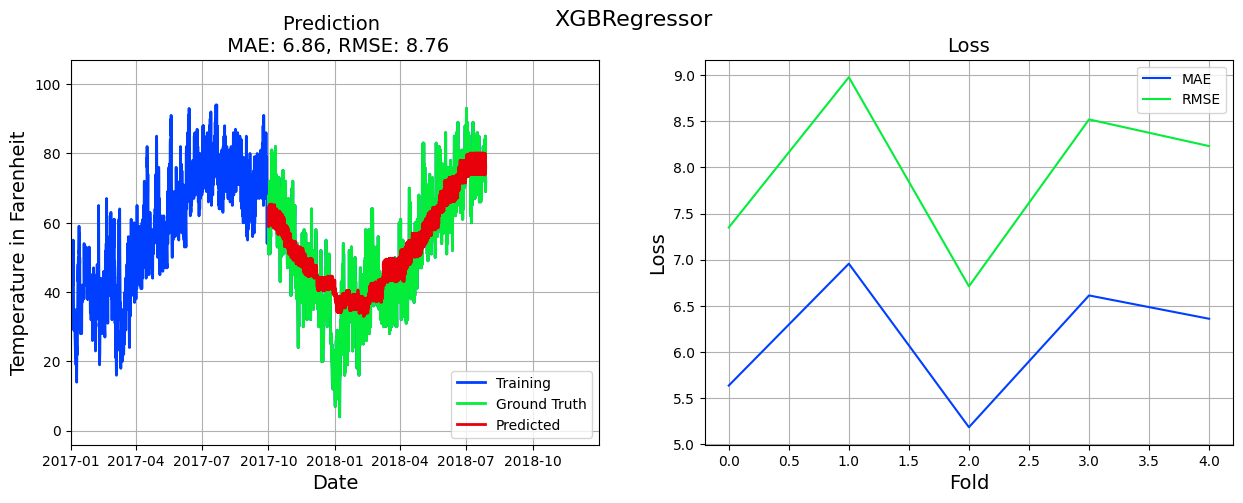

Training HistGradientBoostingRegressor 

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
HistGradientBoostingRegressor has a RMSE score of 8 



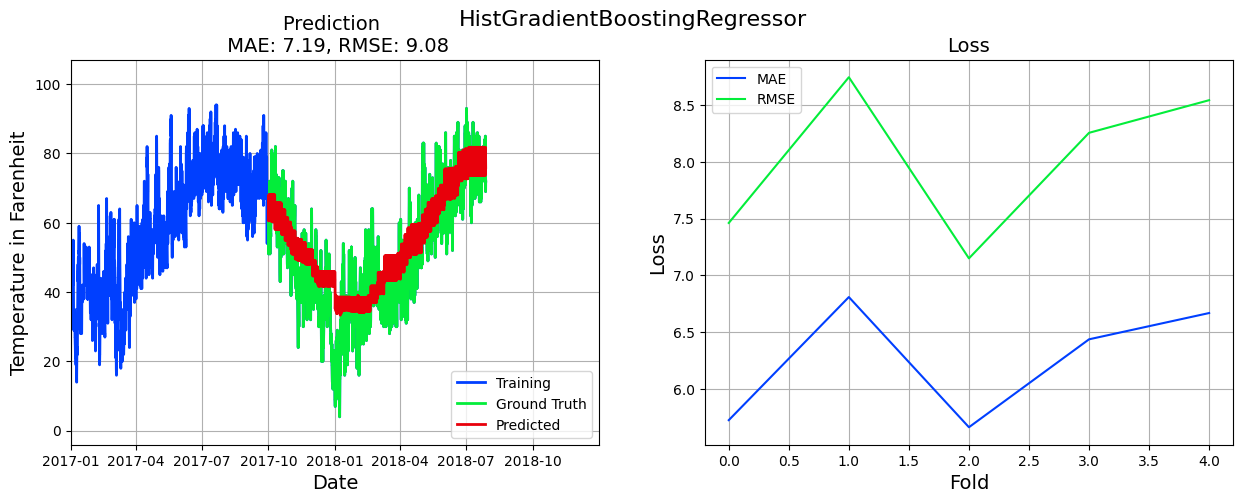

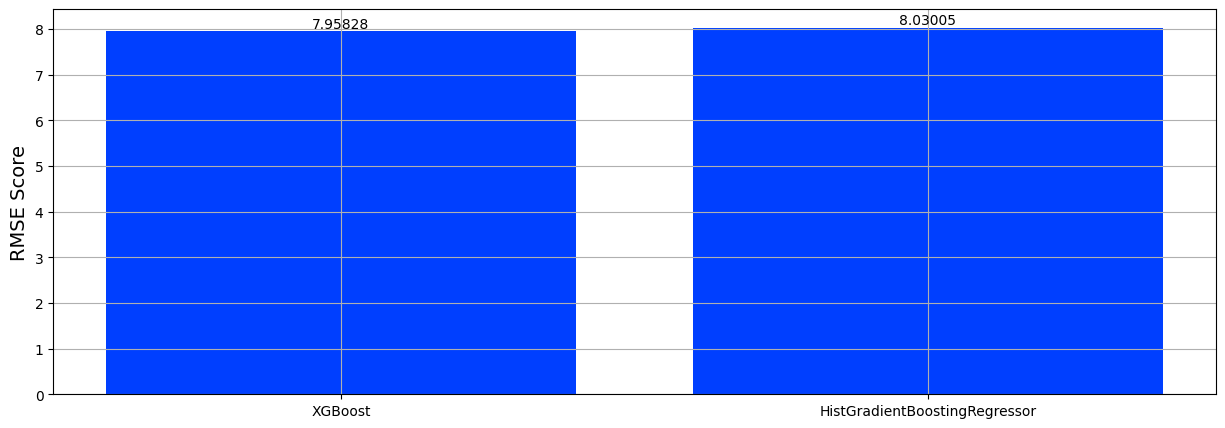

In [24]:
from sklearn.model_selection import GridSearchCV

# Selecting top 2 models
best_models = [item[0] for item in sorted(model_scores.items(), key=lambda item: item[1], reverse=True)[3:]]

grid_models = {}
model_grid_scores = {}

# Iterating through top 2 models
for model in best_models:
    
    print('Training', model, '\n')
    
    score_mae = []
    score_rmse = []
    
    # Iterating through splits
    for train_idx, val_idx in tss.split(df):
        
        # Setting up data
        train = df.iloc[train_idx]
        test = df.iloc[val_idx]

        X_train = train[features]
        y_train = train[target].values.ravel()

        X_test = test[features]
        y_test = test[target]
        
        # Performing Hyperparameter Grid Search with Cross-Valdiation
        grid = GridSearchCV(models[model]['model'], models[model]['params'],
                            scoring='neg_root_mean_squared_error',
                            n_jobs=10,
                            cv=3,
                            error_score='raise',
                            verbose=1)
        grid.fit(X_train, y_train)
        
        # Selecting best hyperparameter combination for the split
        best = grid.best_estimator_
        grid_models[model] = best
        
        # Evaluating split performance
        y_pred = best.predict(X_test.values)
        preds.append(y_pred)
        score_mae.append(mean_absolute_error(y_test, y_pred))
        score_rmse.append(math.sqrt(mean_squared_error(y_test, y_pred)))
        
    # Evaluating model performance
    model_grid_scores[model] = np.mean(score_rmse)
    print(models[model]['model'].__class__.__name__, "has a RMSE score of", round(np.mean(score_rmse)), '\n')
    
    y_pred = best.predict(X_val[features])
    plot_approach_evaluation(y_pred, score_mae, score_rmse, models[model]['model'].__class__.__name__)
    
# Evaluating model performance
compare_models(model_grid_scores)

## Model Validation

### Adding lag to validation dataset

In [25]:
y_val = add_lag(y_val)

### Visualizing Best performing model Learning Curve

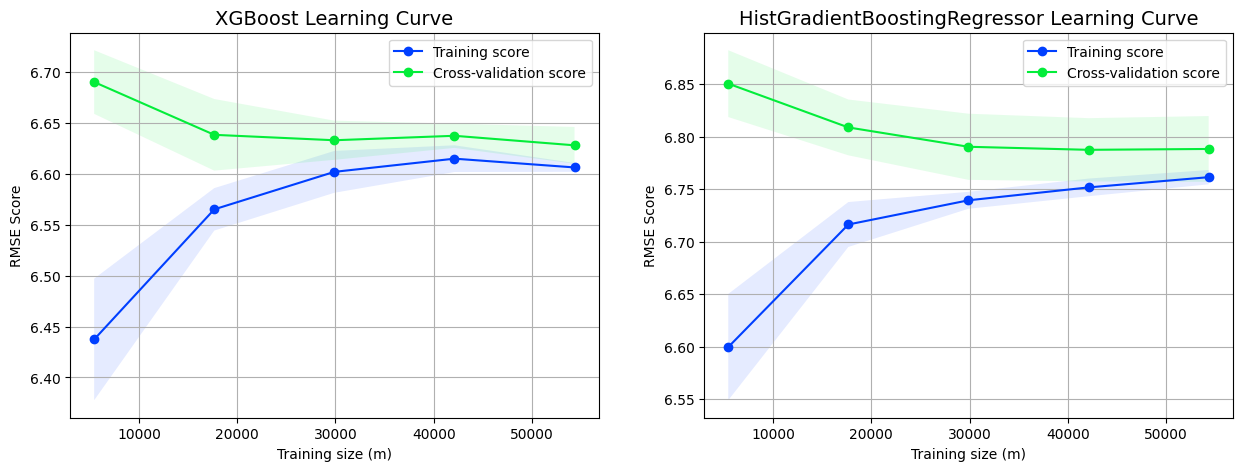

In [26]:
from sklearn.model_selection import ShuffleSplit, learning_curve

cv = ShuffleSplit(n_splits=N_SPLITS, test_size=0.2)

fig, axs = plt.subplots(1,2, figsize=(15, 5))

for model, ax in zip(grid_models, [axs[0], axs[1]]):
    train_sizes, train_scores, test_scores = learning_curve(
        grid_models[model], y_val.drop('drybulbtempf',axis=1), y_val['drybulbtempf'], cv=cv, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), scoring='neg_root_mean_squared_error')
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1)
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1)
    ax.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
    ax.set_title(f"{model} Learning Curve", fontsize=14)
    ax.set_xlabel('Training size (m)')
    ax.set_ylabel('RMSE Score')
    ax.grid(True)
    ax.legend(loc="best")

### Checking feature importance

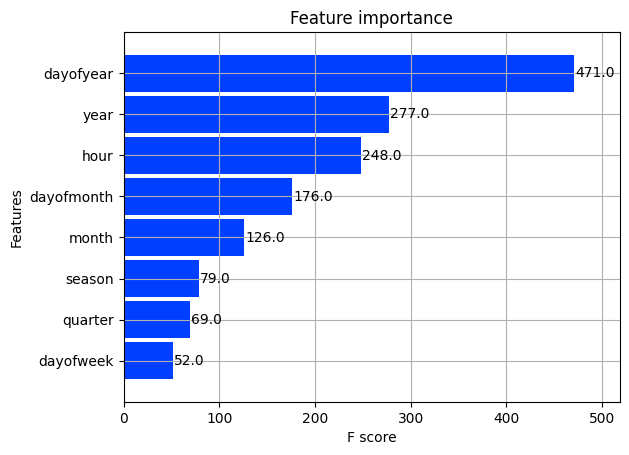

In [27]:
from xgboost import plot_importance

_ = plot_importance(grid_models['XGBoost'], height=0.9)

## Final Model Training

### Training final model on all data

In [28]:
X_train = df.drop('drybulbtempf',axis=1)
y_train = df[target]

model = grid_models['XGBoost']
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Model Interpretation and Visualization
---

In [29]:
df_all = df.drop('drybulbtempf',axis=1)
df_all['prediction'] = model.predict(df_all)

### Interpreting the results along with the actual observations

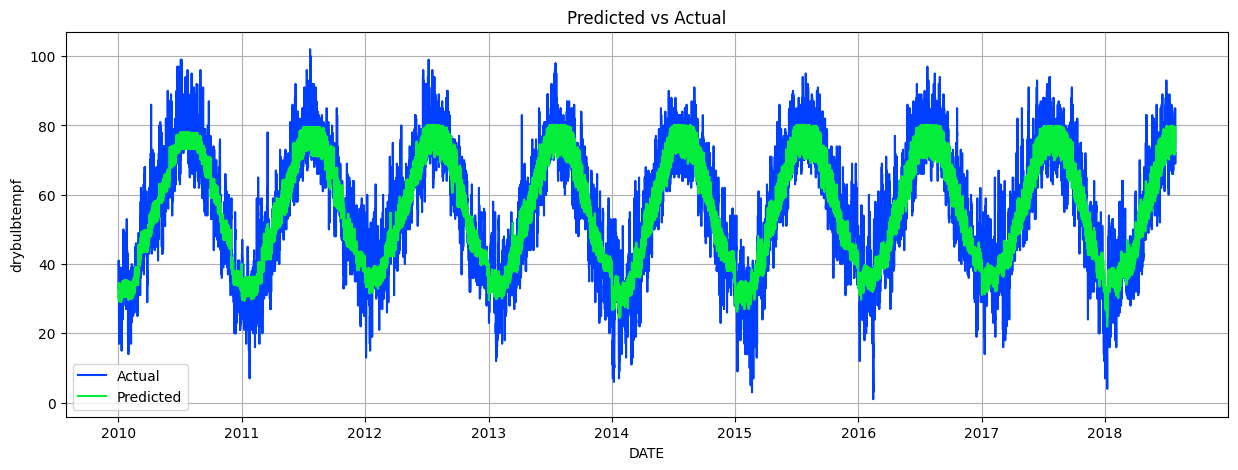

In [30]:
fig, ax = plt.subplots(figsize=(15, 5))
df_all['DATE'] = df.index
df_all['drybulbtempf'] = df['drybulbtempf']
sns.lineplot(x=df_all['DATE'], y=df_all['drybulbtempf'], label='Actual',ax=ax)
sns.lineplot(x=df_all['DATE'], y=df_all['prediction'], label='Predicted',ax=ax)
ax.set_title('Predicted vs Actual')
ax.grid(True)
plt.show()

### Month

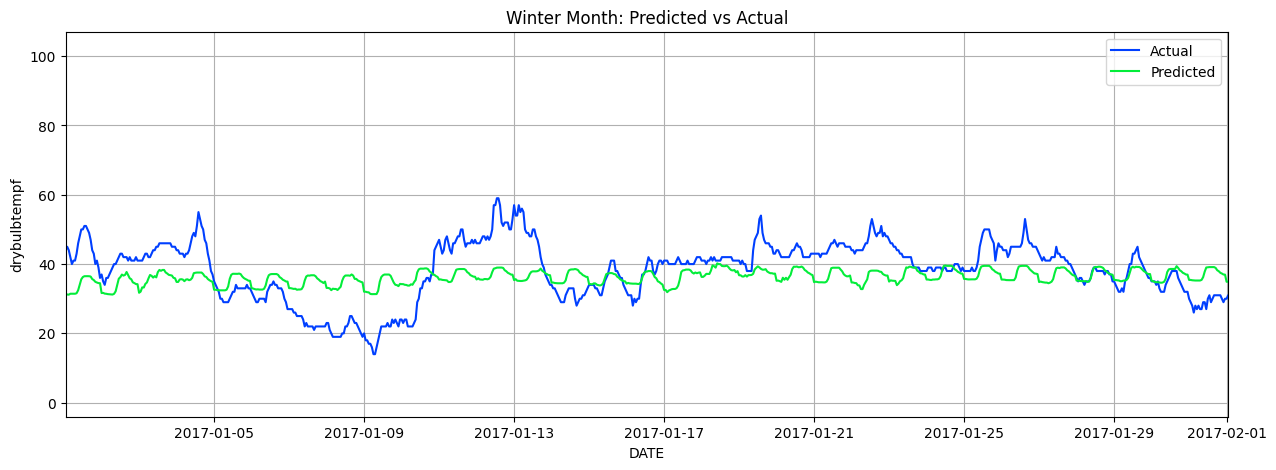

In [31]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x=df_all['DATE'], y=df_all['drybulbtempf'], label='Actual',ax=ax)
sns.lineplot(x=df_all['DATE'], y=df_all['prediction'], label='Predicted',ax=ax)
ax.set_xlim(left=pd.to_datetime('2017-01-01 01:00:00'), right=pd.to_datetime('2017-02-01 01:00:00'))
ax.set_title('Winter Month: Predicted vs Actual')
ax.grid(True)
plt.show()

It appears the model captured a cyclical pattern, with peaks and troughs occurring at regular intervals, suggesting a diurnal variation in temperature

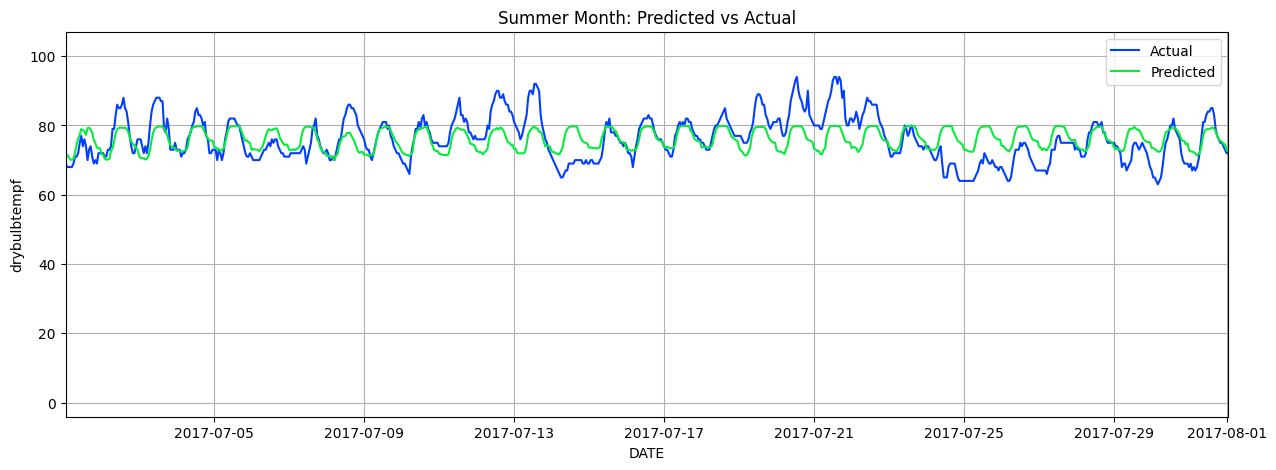

In [32]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x=df_all['DATE'], y=df_all['drybulbtempf'], label='Actual',ax=ax)
sns.lineplot(x=df_all['DATE'], y=df_all['prediction'], label='Predicted',ax=ax)
ax.set_xlim(left=pd.to_datetime('2017-07-01 01:00:00'), right=pd.to_datetime('2017-08-01 01:00:00'))
ax.set_title('Summer Month: Predicted vs Actual')
ax.grid(True)
plt.show()

Summer predictions are more accurate as summer climate has lower stadard deviation

### Winter Week

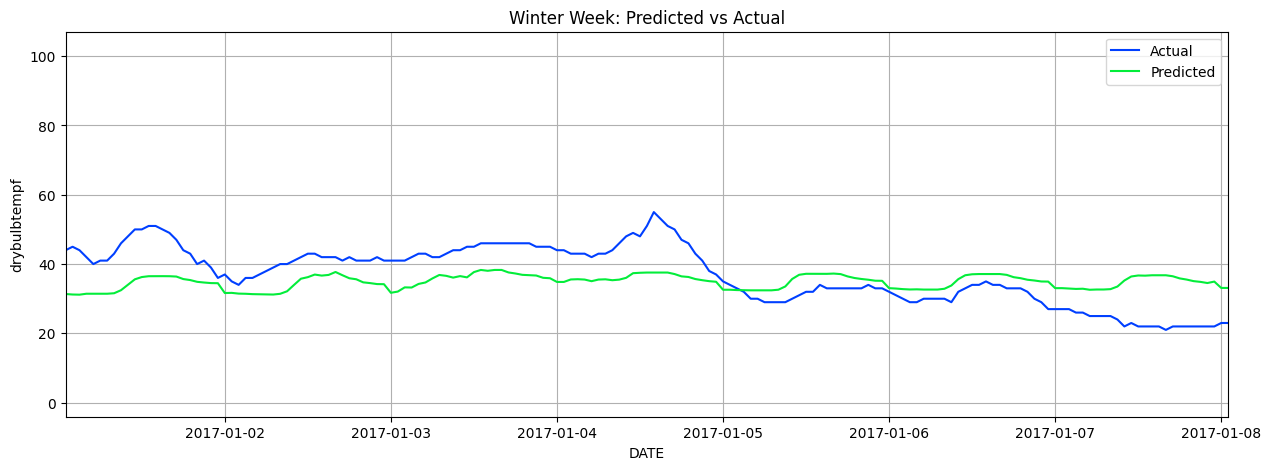

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x=df_all['DATE'], y=df_all['drybulbtempf'], label='Actual',ax=ax)
sns.lineplot(x=df_all['DATE'], y=df_all['prediction'], label='Predicted',ax=ax)
ax.set_xlim(left=pd.to_datetime('2017-01-01 01:00:00'), right=pd.to_datetime('2017-01-08 01:00:00'))
ax.set_title('Winter Week: Predicted vs Actual')
ax.grid(True)
plt.show()

### Summer week

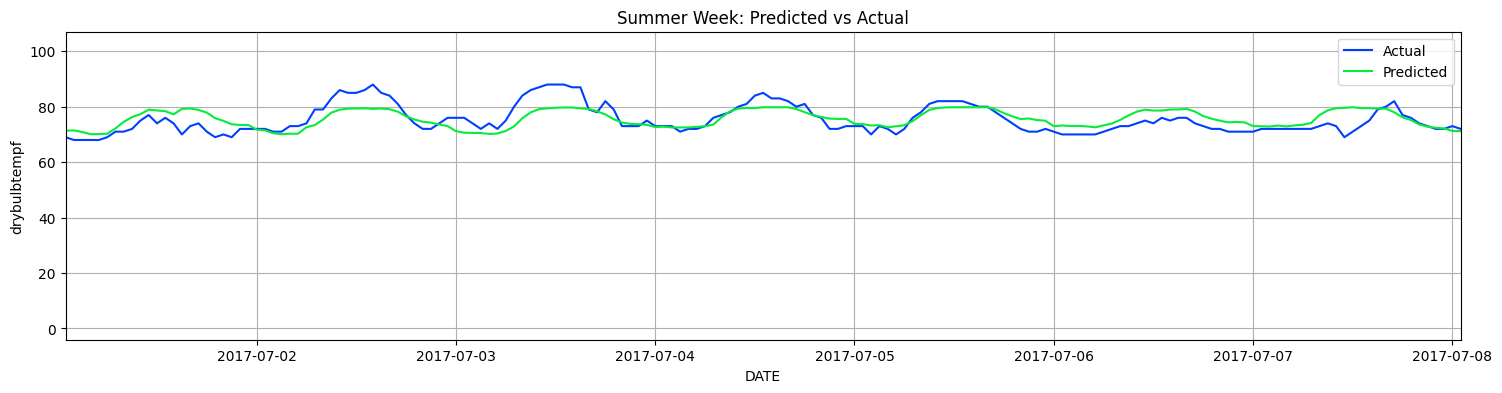

In [34]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.lineplot(x=df_all['DATE'], y=df_all['drybulbtempf'], label='Actual', ax=ax)
sns.lineplot(x=df_all['DATE'], y=df_all['prediction'], label='Predicted', ax=ax)
ax.set_xlim(left=pd.to_datetime('2017-07-01 01:00:00'), right=pd.to_datetime('2017-07-08 01:00:00'))
ax.set_title('Summer Week: Predicted vs Actual')
ax.grid(True)
plt.show()

### Defining formula for mean absolute percentage error

In [35]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Evaluating

In [36]:
print('RMSE: ', round(mean_squared_error(y_true=df_all['drybulbtempf'],
                   y_pred=df_all['prediction']),ndigits=2))

print('MAE: ', round(mean_absolute_error(y_true=df_all['drybulbtempf'],
                   y_pred=df_all['prediction']),ndigits=2))

print('MAPE: ', round(mean_absolute_percentage_error(y_true=df_all['drybulbtempf'],
                   y_pred=df_all['prediction']),ndigits=2), '%')

RMSE:  45.6
MAE:  5.27
MAPE:  12.41 %


### Calculating Mean Error Metrics by Day

In [37]:
df_all['error'] = df_all['drybulbtempf'] - df_all['prediction']
df_all['abs_error'] = df_all['error'].apply(np.abs)
error_by_day = df_all.groupby(['year','month','dayofmonth']) \
    .mean()[['drybulbtempf','prediction','error','abs_error']]

In [38]:
# Over forecasted days
error_by_day.sort_values('error', ascending=True).head(10)

drybulbtempf  prediction      error  abs_error
year month dayofmonth                                                
2016 2     14              9.833333   34.439014 -24.605681  24.605681
2015 2     20             11.875000   34.608517 -22.733516  22.733516
2011 1     24             13.958333   33.595280 -19.636945  19.636945
2014 1     7              10.583333   30.218019 -19.634686  19.634686
2017 3     11             23.541667   42.145912 -18.604246  18.604246
     12    31             15.041667   33.596447 -18.554781  18.554781
2015 2     24             15.875000   34.183189 -18.308190  18.308190
2017 12    28             15.750000   33.989517 -18.239518  18.239518
2016 12    16             23.625000   41.760960 -18.135961  18.135961
2017 12    29             16.666667   34.362000 -17.695332  17.695332

In [39]:
# Worst absolute predicted days
error_by_day.sort_values('abs_error', ascending=False).head(10)

drybulbtempf  prediction      error  abs_error
year month dayofmonth                                                
2016 2     14              9.833333   34.439014 -24.605681  24.605681
2015 2     20             11.875000   34.608517 -22.733516  22.733516
2011 1     24             13.958333   33.595280 -19.636945  19.636945
2014 1     7              10.583333   30.218019 -19.634686  19.634686
2017 3     11             23.541667   42.145912 -18.604246  18.604246
     12    31             15.041667   33.596447 -18.554781  18.554781
2016 3     11             60.000000   41.687237  18.312764  18.312764
2015 2     24             15.875000   34.183189 -18.308190  18.308190
2017 12    28             15.750000   33.989517 -18.239518  18.239518
2015 1     4              48.750000   30.610224  18.139774  18.139774

In [40]:
# Best predicted days
error_by_day.sort_values('abs_error', ascending=True).head(10)

drybulbtempf  prediction     error  abs_error
year month dayofmonth                                               
2014 8     4              75.166667   75.468826 -0.302157   0.608152
2017 1     28             36.708333   36.980846 -0.272511   0.611111
2016 10    1              60.416667   60.979198 -0.562533   0.751706
     8     30             76.291667   76.353218 -0.061553   0.807932
     6     27             73.250000   73.643852 -0.393852   0.847021
2010 2     18             35.833333   35.699440  0.133893   0.856730
2015 1     15             31.125000   31.382101 -0.257101   0.862275
2016 12    3              45.208333   44.517761  0.690571   0.901964
           13             40.833333   40.599915  0.233419   0.908477
2017 4     21             52.291667   52.368382 -0.076717   0.912056

### Worst Forecasted days

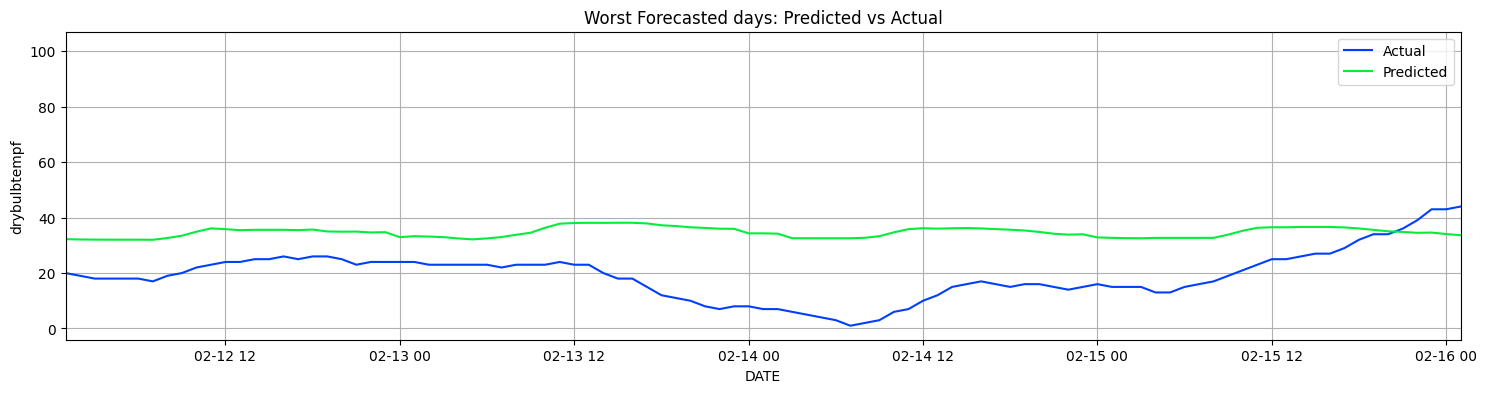

In [41]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.lineplot(x=df_all['DATE'], y=df_all['drybulbtempf'], label='Actual',ax=ax)
sns.lineplot(x=df_all['DATE'], y=df_all['prediction'], label='Predicted',ax=ax)
ax.set_xlim(left=pd.to_datetime('2016-02-12 01:00:00'), right=pd.to_datetime('2016-02-16 01:00:00'))
ax.set_title('Worst Forecasted days: Predicted vs Actual')
ax.grid(True)
plt.show()

### Best Forecasted days

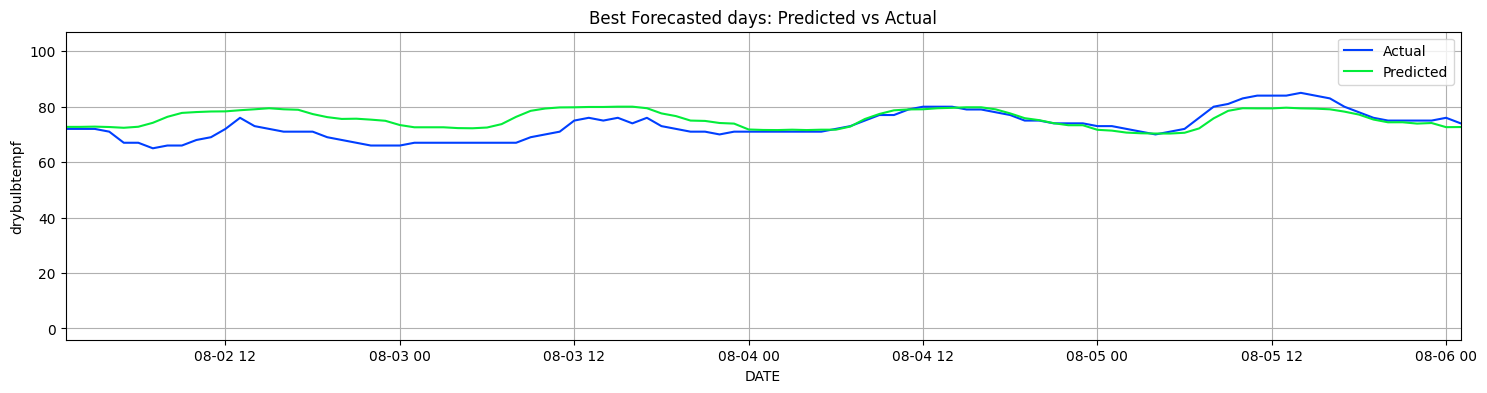

In [42]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.lineplot(x=df_all['DATE'], y=df_all['drybulbtempf'], label='Actual',ax=ax)
sns.lineplot(x=df_all['DATE'], y=df_all['prediction'], label='Predicted',ax=ax)
ax.set_xlim(left=pd.to_datetime('2014-08-02 01:00:00'), right=pd.to_datetime('2014-08-06 01:00:00'))
ax.set_title('Best Forecasted days: Predicted vs Actual')
ax.grid(True)
plt.show()